In [200]:
#part 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from scipy import stats 
import numpy as np

In [3]:
df = pd.read_csv('/Users/chenlianxu/Downloads/energydata_complete.csv')

In [4]:
df.shape

(19735, 29)

In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [192]:
df['NSM'] = pd.to_datetime(df.date)-pd.to_datetime(df.date.str.split('\s+').str[0]+" 00:00:00")
def time_to_second(time):
    return time.total_seconds()
df['NSM'] = df['NSM'].apply(time_to_second)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200.0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800.0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400.0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,63000.0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600.0


The data of Appliances and lights are skewed

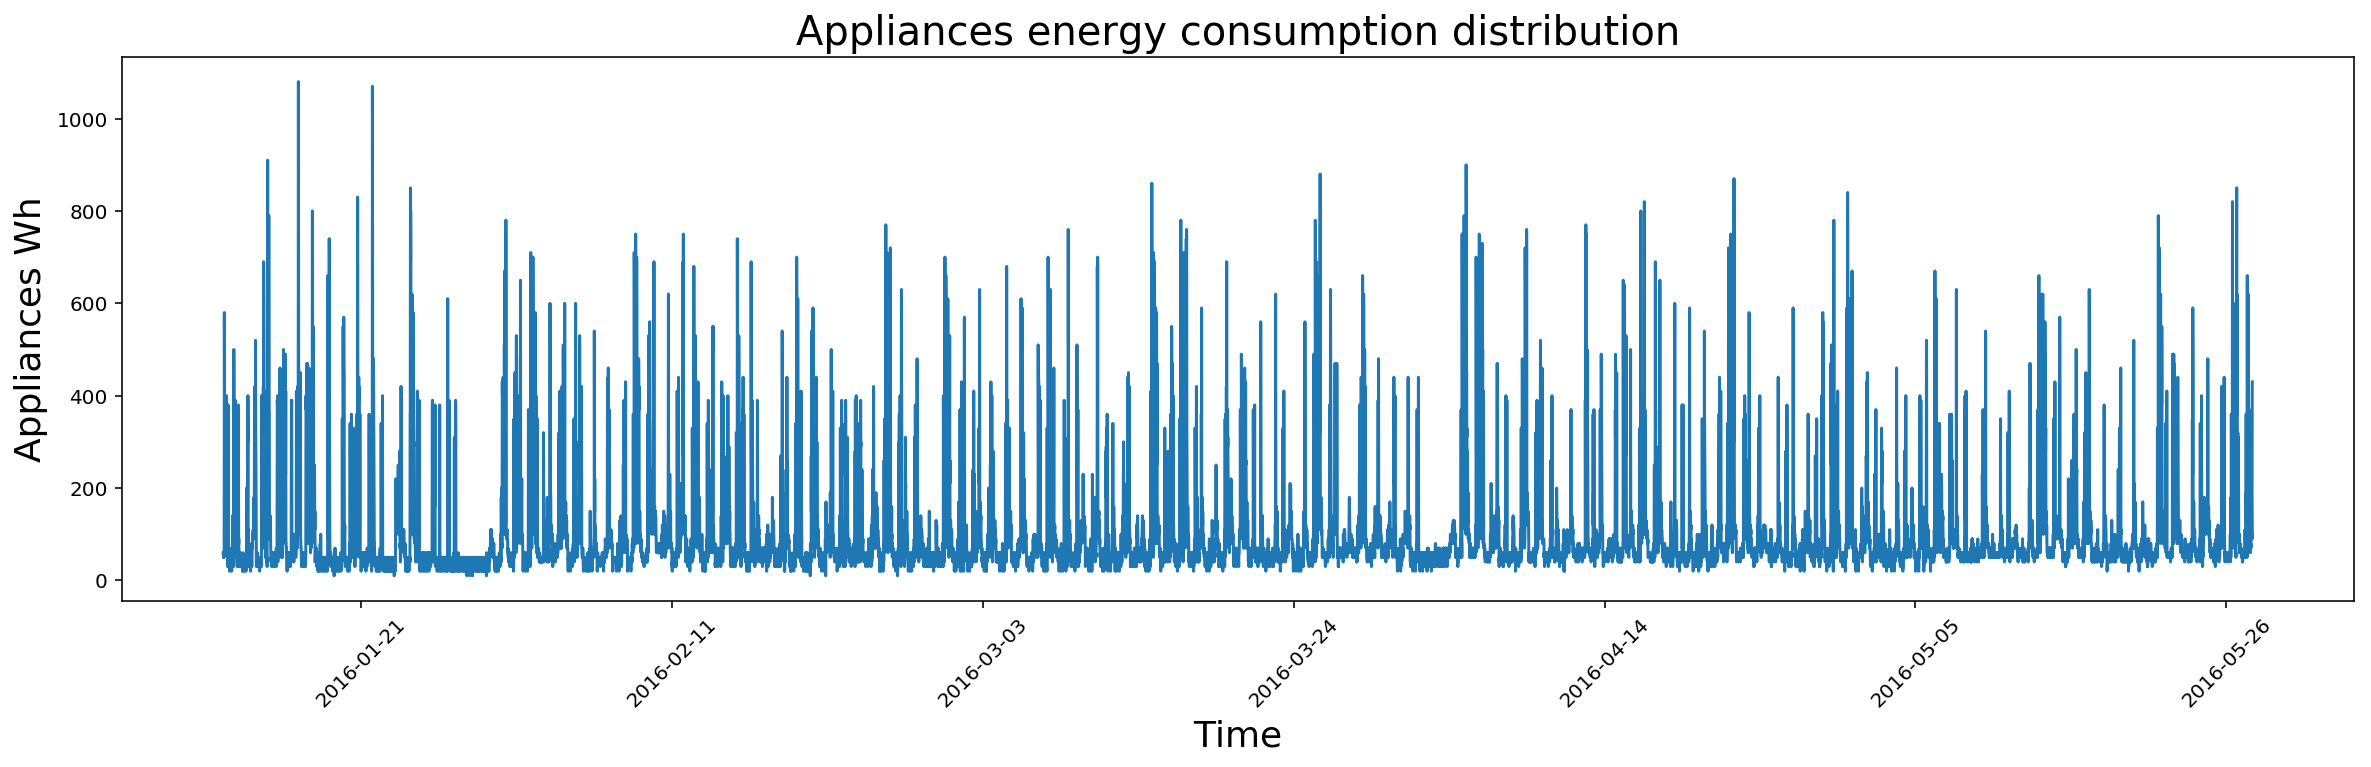

In [20]:
date = pd.to_datetime(df['date'])
appliances = df['Appliances']
plt.figure(figsize=(20,5))
plt.title("Appliances energy consumption distribution",fontsize=20)
plt.xlabel("Time",fontsize=18)
plt.ylabel("Appliances Wh",fontsize=18)
plt.xticks(rotation=45)
plt.plot(date,appliances)
plt.show()

appliances data in one month

In [24]:
date_list = ["2016-02-"+date for date in ["{:02d}".format(x) for x in range(1,8)]]

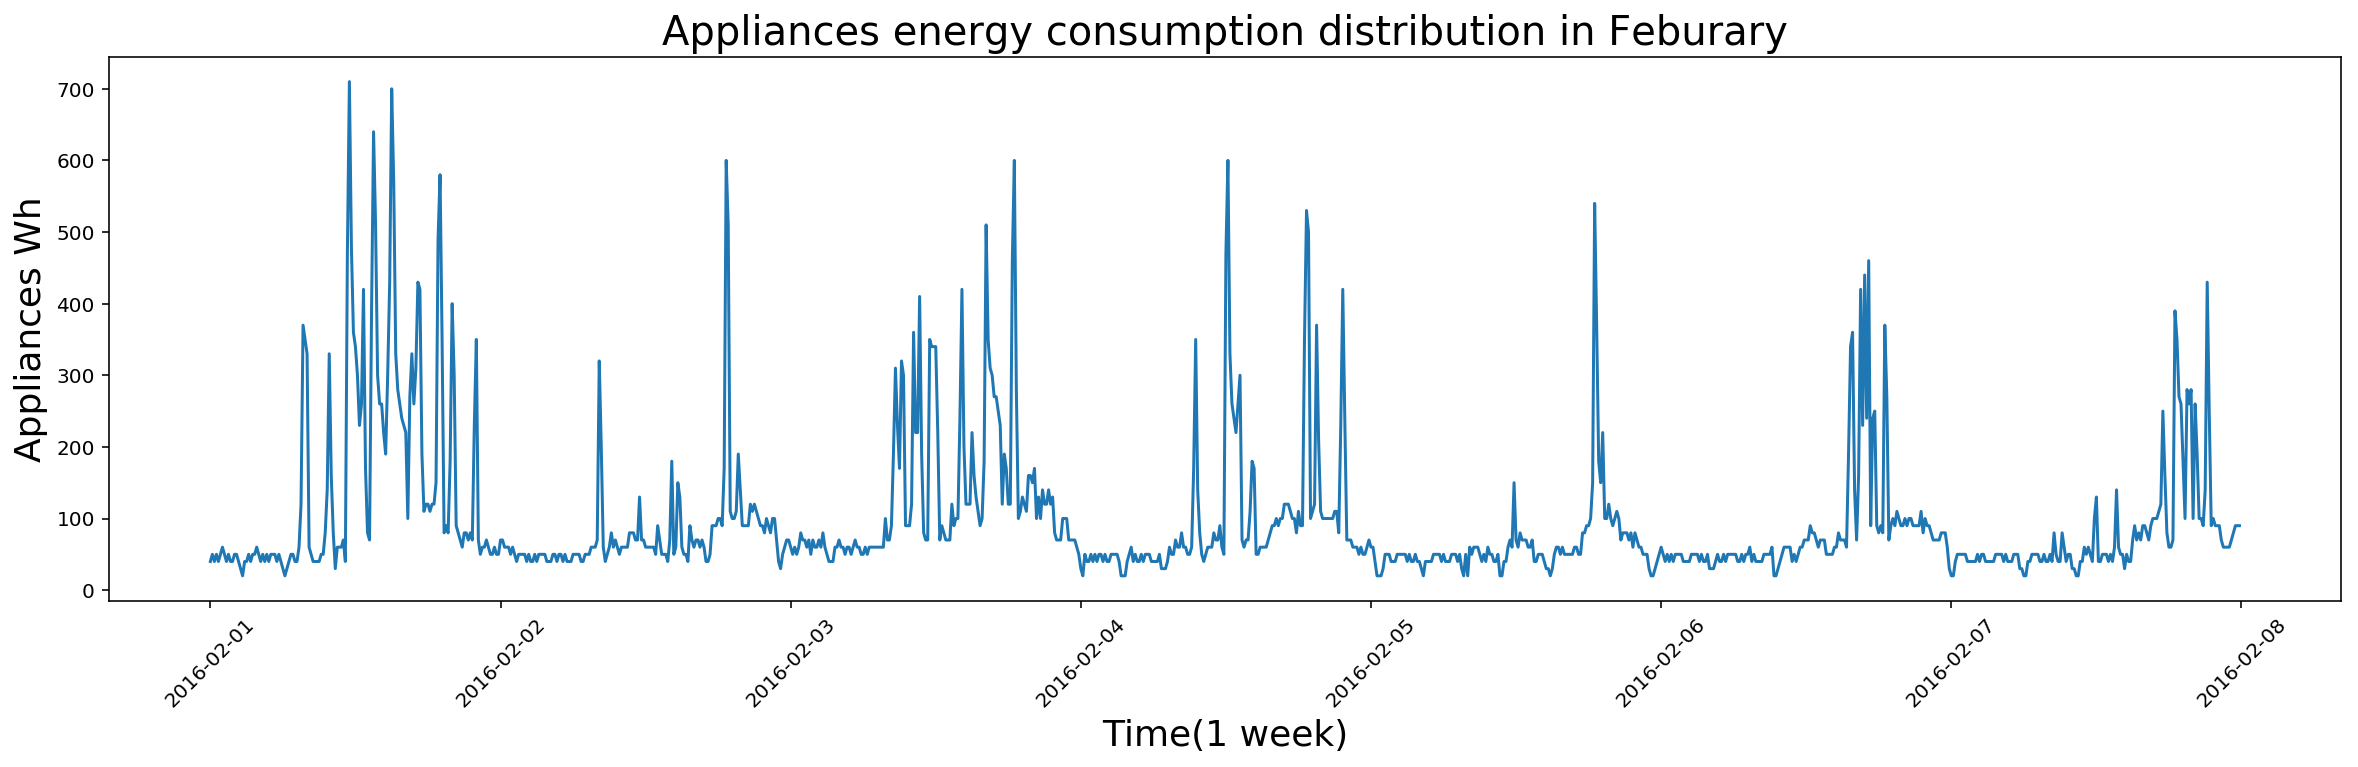

In [27]:
df_week = df[df.date.str.contains('|'.join(date_list))]
date = pd.to_datetime(df_week['date'])
appliances = df_week['Appliances']
plt.figure(figsize=(20,5))
plt.title("Appliances energy consumption distribution in Feburary",fontsize=20)
plt.xlabel("Time(1 week)",fontsize=18)
plt.ylabel("Appliances Wh",fontsize=18)
plt.xticks(rotation=45)
plt.plot(date,appliances)
plt.show()

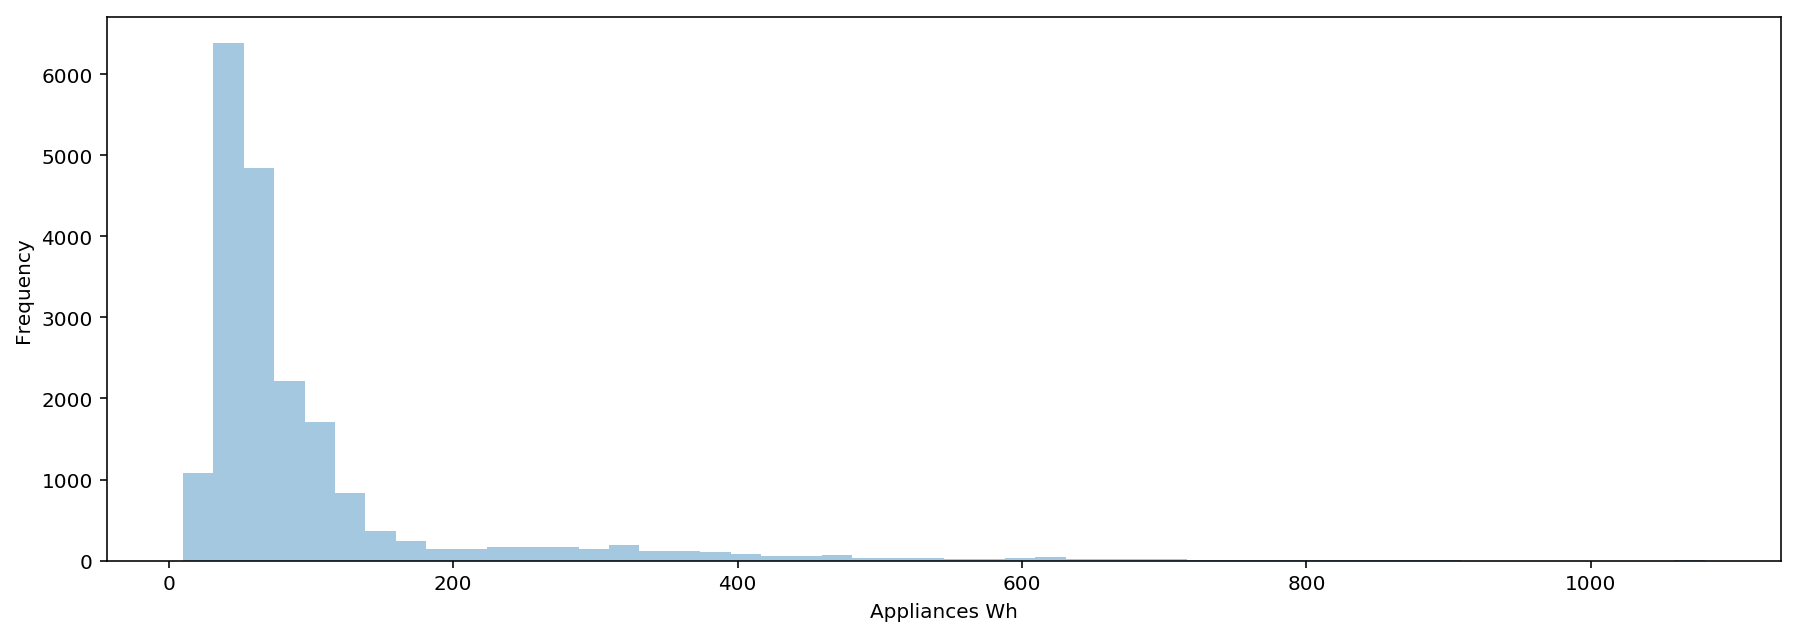

In [36]:
plt.figure(figsize=(15,5))
sns.distplot(df.Appliances, kde=False)
plt.xlabel("Appliances Wh")
plt.ylabel("Frequency")
plt.show()

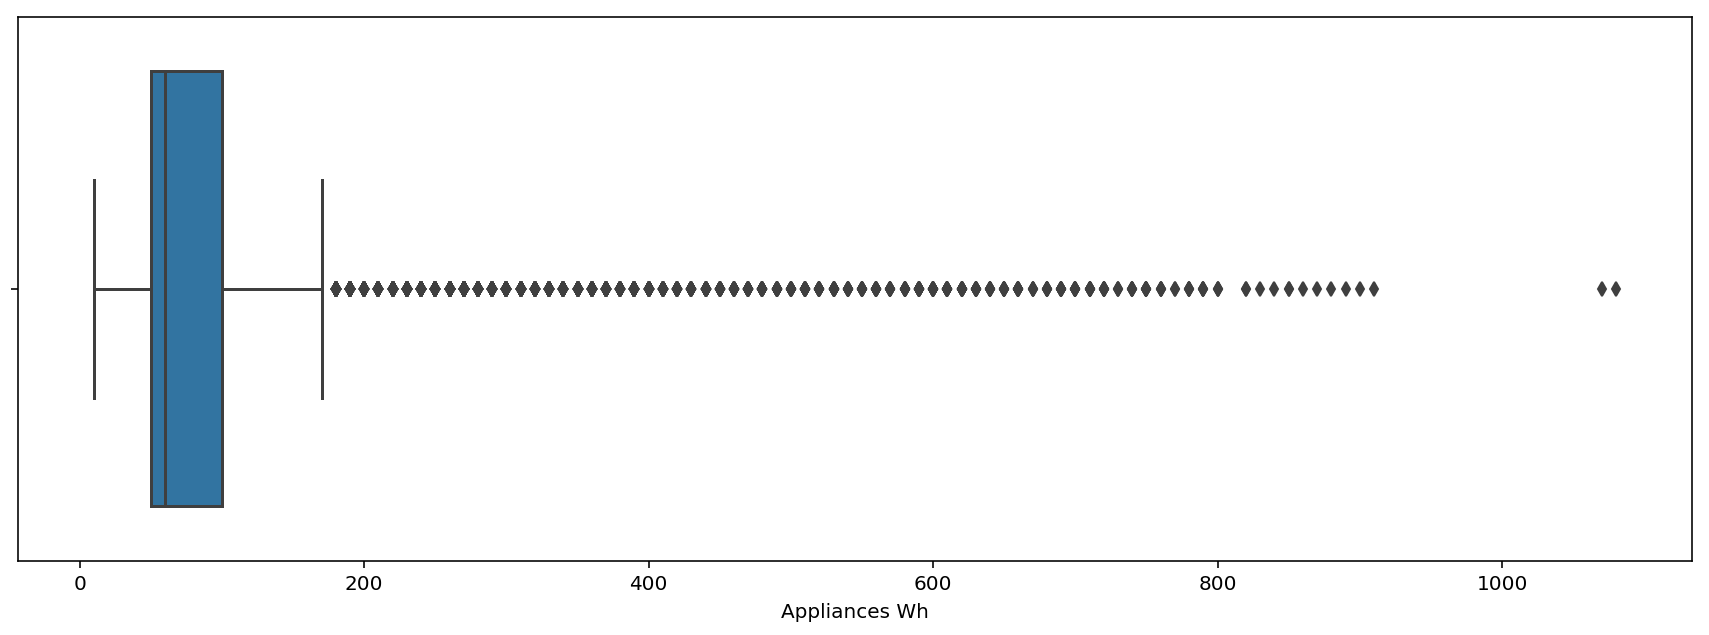

In [37]:
plt.figure(figsize=(15,5))
sns.boxplot(df.Appliances)
plt.xlabel("Appliances Wh")
plt.show()

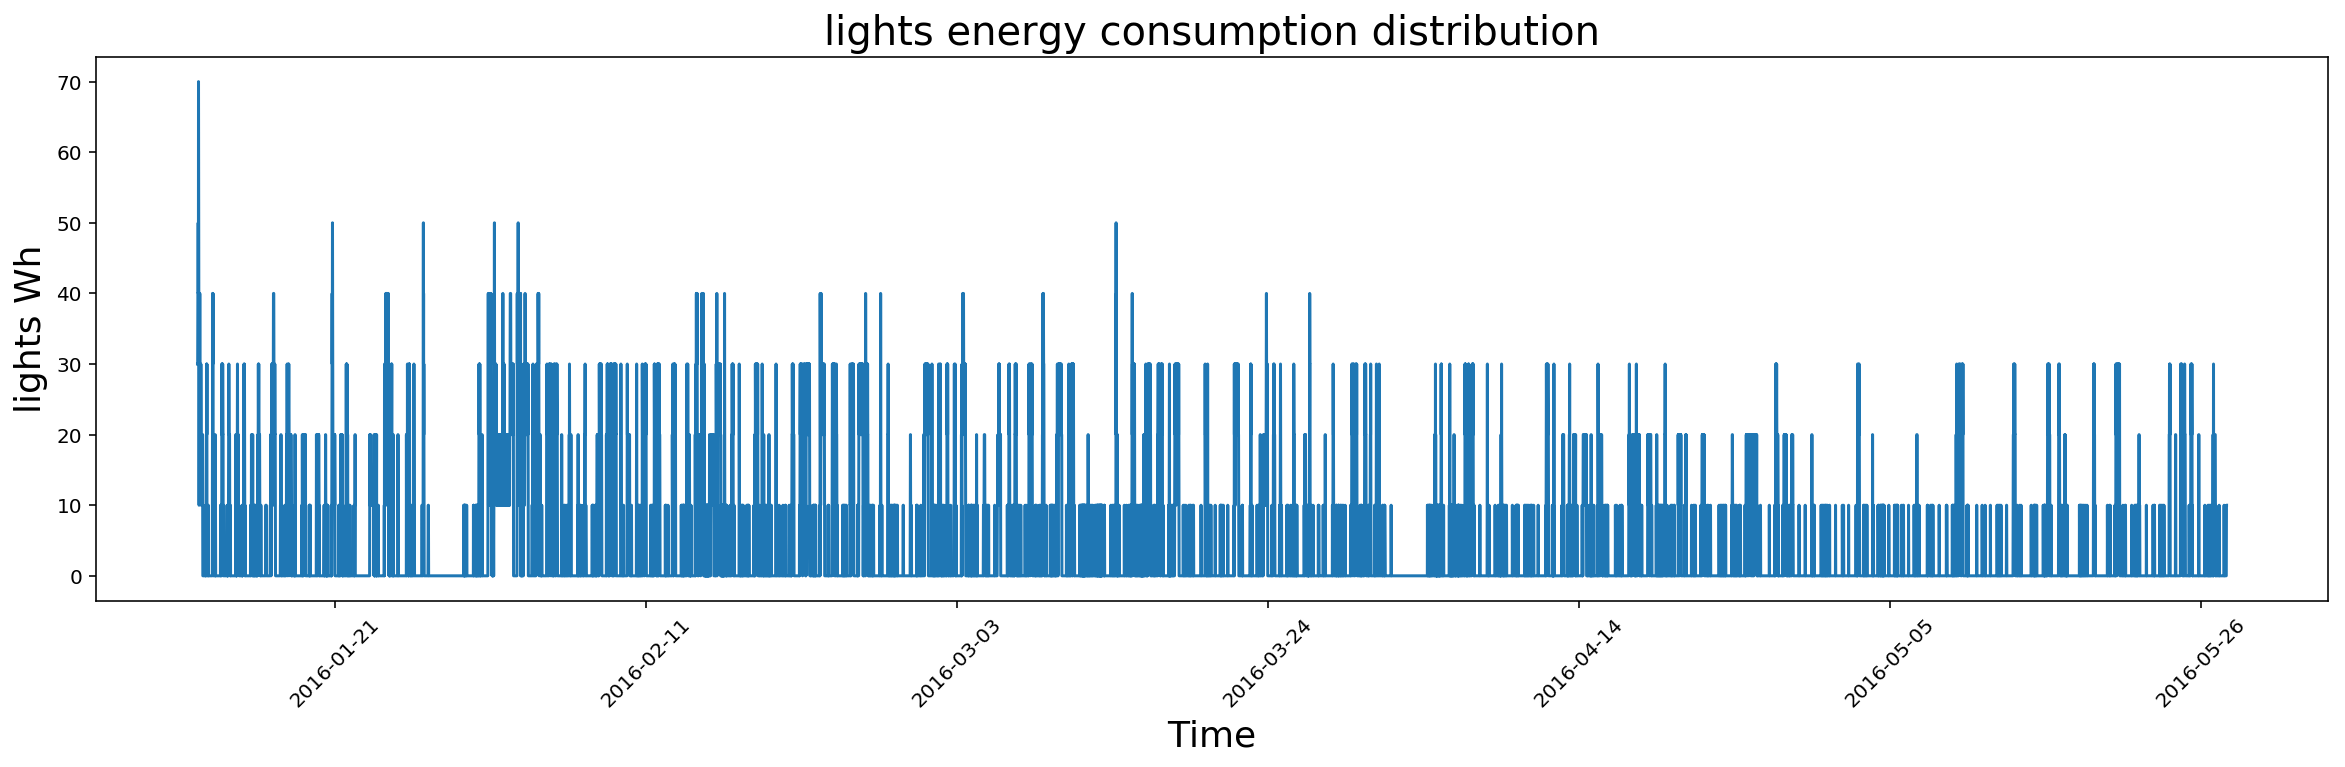

In [38]:
date = pd.to_datetime(df['date'])
lights = df['lights']
plt.figure(figsize=(20,5))
plt.title("lights energy consumption distribution",fontsize=20)
plt.xlabel("Time",fontsize=18)
plt.ylabel("lights Wh",fontsize=18)
plt.xticks(rotation=45)
plt.plot(date,lights)
plt.show()

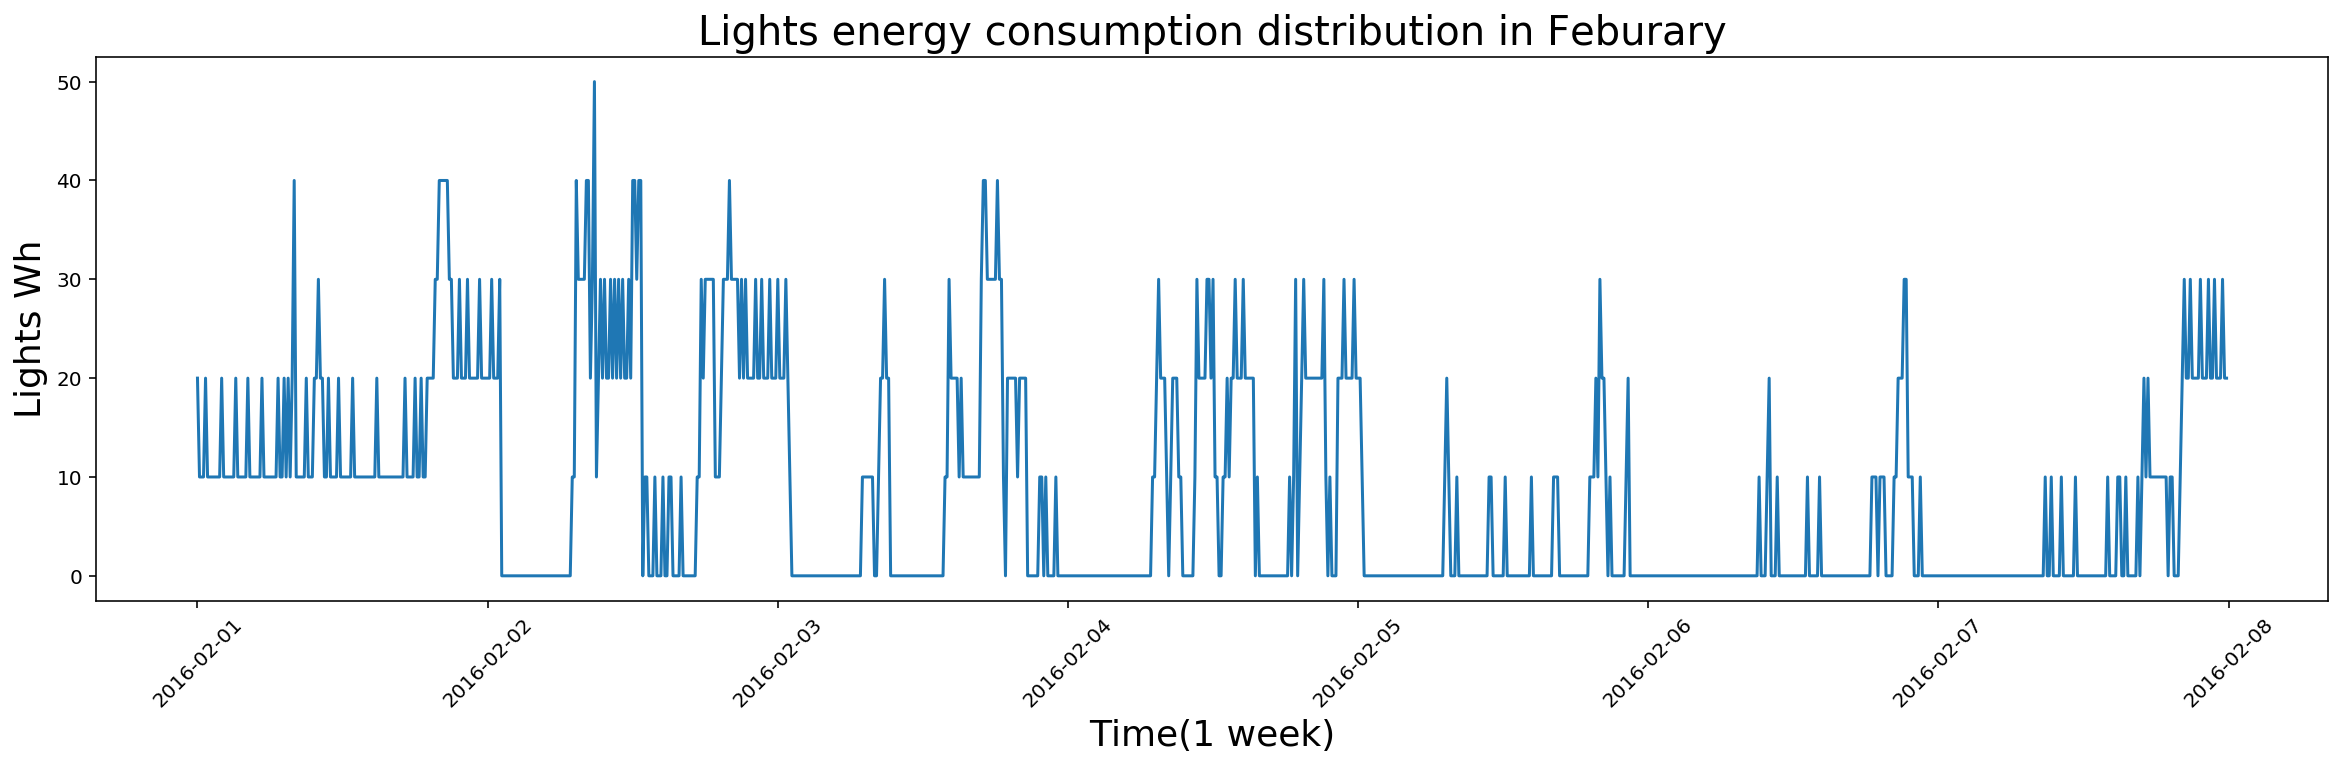

In [39]:
df_week = df[df.date.str.contains('|'.join(date_list))]
date = pd.to_datetime(df_week['date'])
lights = df_week['lights']
plt.figure(figsize=(20,5))
plt.title("Lights energy consumption distribution in Feburary",fontsize=20)
plt.xlabel("Time(1 week)",fontsize=18)
plt.ylabel("Lights Wh",fontsize=18)
plt.xticks(rotation=45)
plt.plot(date,lights)
plt.show()

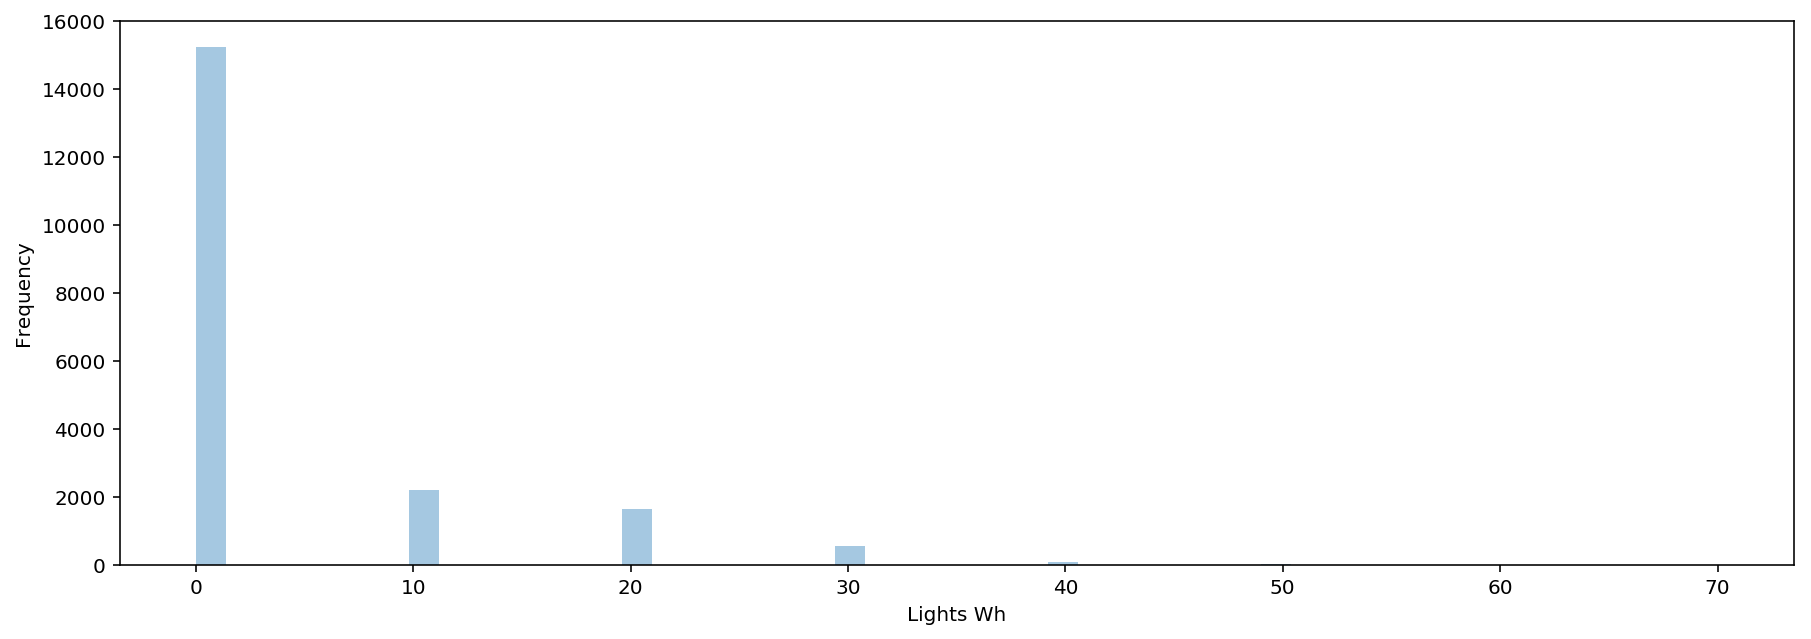

In [40]:
plt.figure(figsize=(15,5))
sns.distplot(df.lights, kde=False)
plt.xlabel("Lights Wh")
plt.ylabel("Frequency")
plt.show()

In [43]:
list_month = ["2016-"+ month for month in ["{:02d}".format(x) for x in range(1,6)]]

In [45]:
list_app = [df[df.date.str.contains(x)]['Appliances'].sum() for x in list_month]

In [47]:
list_light = [df[df.date.str.contains(x)]['lights'].sum() for x in list_month]

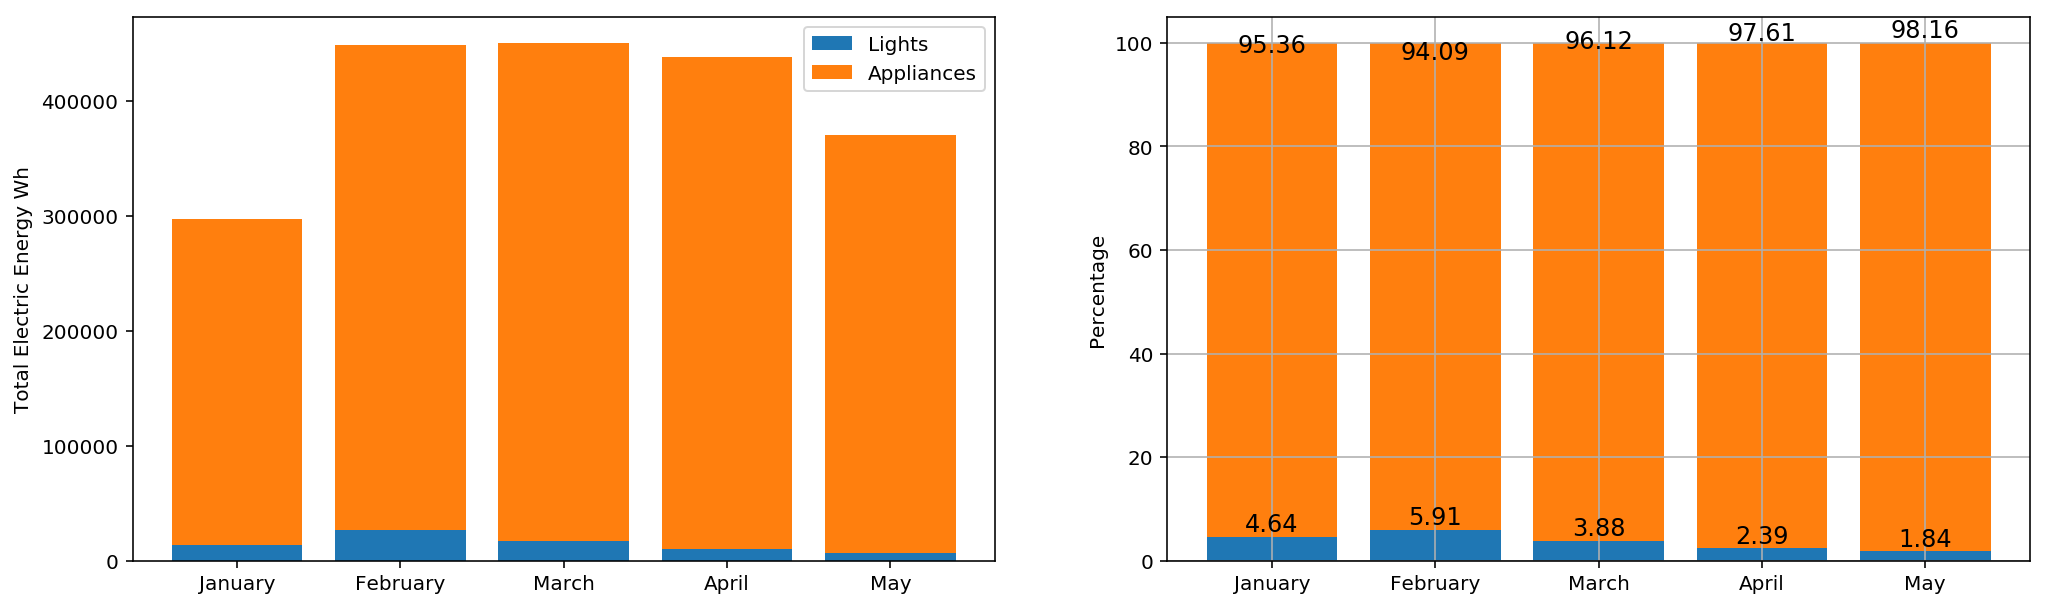

In [92]:
xlable_list = ['January','February','March','April','May']
x = len(xlable_list)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.bar(range(len(list_app)), list_light, label='Lights')
ax1.bar(range(len(list_app)), list_app, bottom=list_light, label='Appliances',tick_label = xlable_list) 
plt.sca(ax1)
ax1.set_ylabel("Total Electric Energy Wh")
plt.legend()


totals = [i+j for i,j in zip(list_app, list_light)]
app_rel = [i / j * 100 for  i,j in zip(list_app, totals)]
light_rel = [i / j * 100 for  i,j in zip(list_light, totals)]
bar1 = ax2.bar(range(len(list_app)),light_rel,
        label='Lights')
bar2 = ax2.bar(range(len(list_app)), app_rel,
        bottom=light_rel, label='Appliances',tick_label = xlable_list)
plt.sca(ax2)
for b,d in zip(range(len(list_app)), app_rel):
    plt.text(b, 1.02*d, '%.2f' %d, ha='center', va='bottom', fontsize=12)
for b,d in zip(range(len(list_app)), light_rel):
    plt.text(b, 1.02*d, '%.2f' %d, ha='center', va='bottom', fontsize=12)    
ax2.set_ylabel("Percentage")
plt.grid()

plt.show()

In [103]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

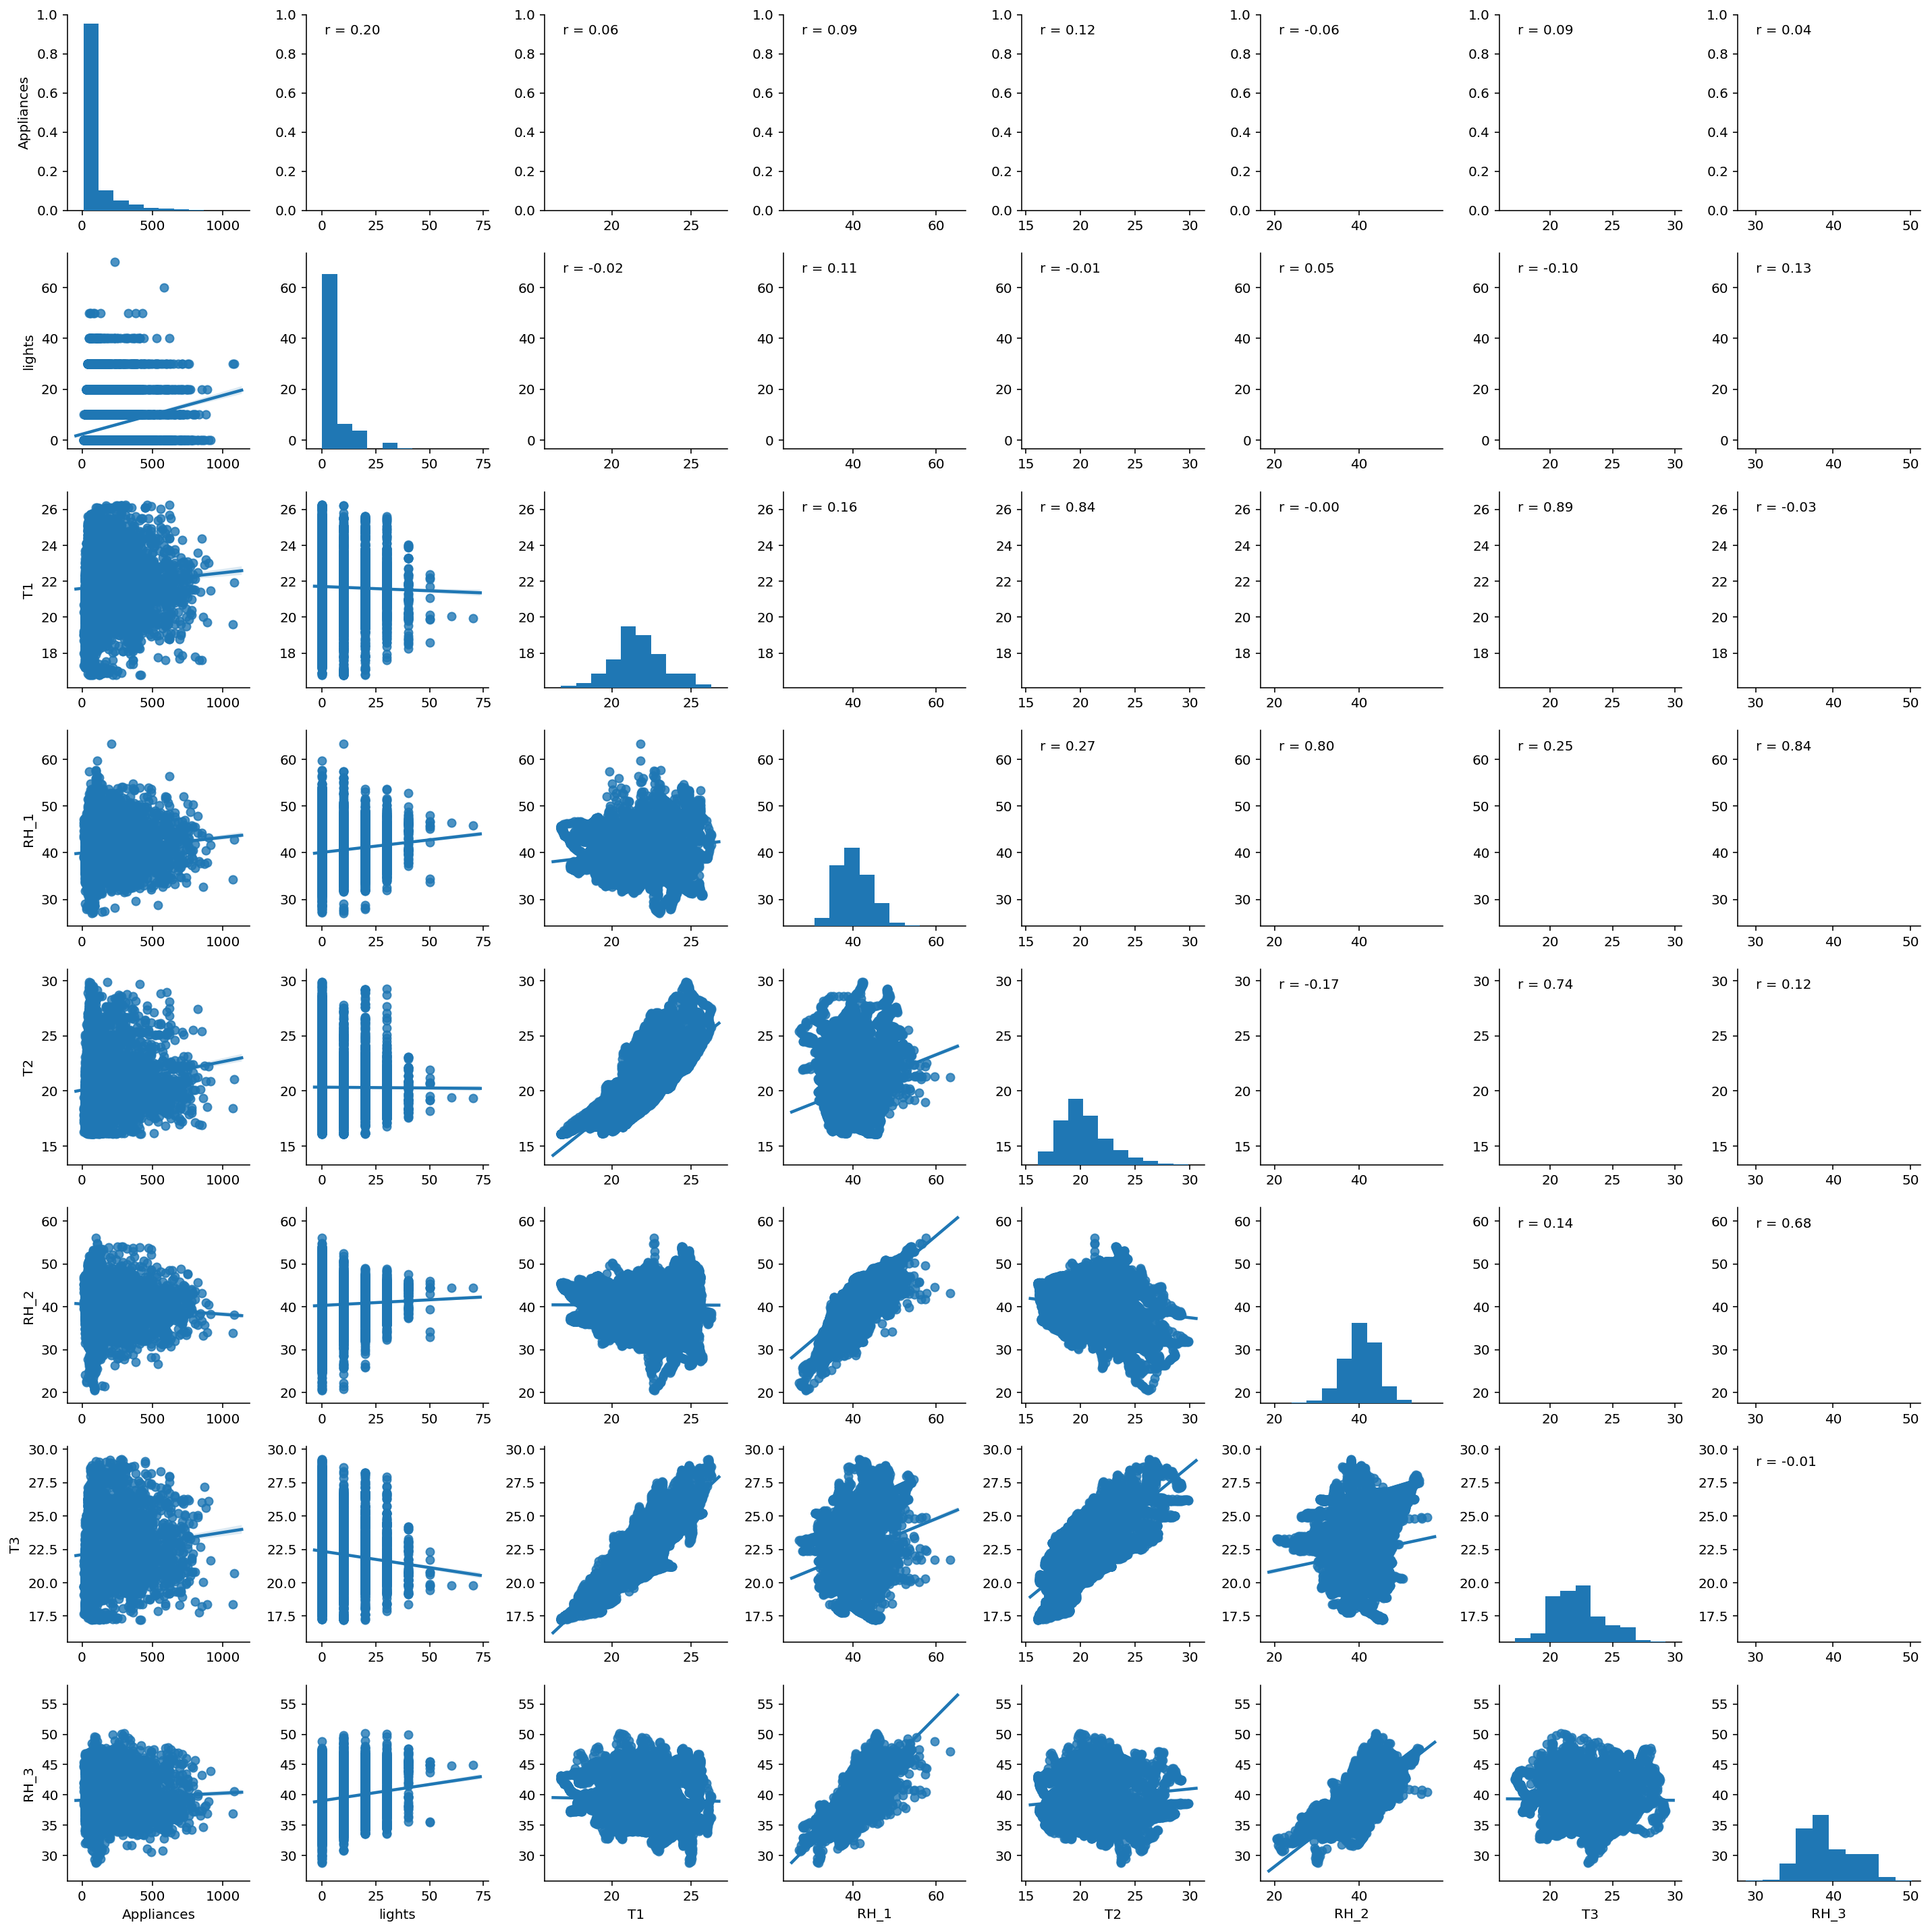

In [107]:
g = sns.PairGrid(df[['Appliances', 'lights', 'T1','RH_1','T2','RH_2','T3','RH_3']]) 
g.map_lower(sns.regplot) 
g.map_diag(plt.hist) 
g.map_upper(corrfunc)

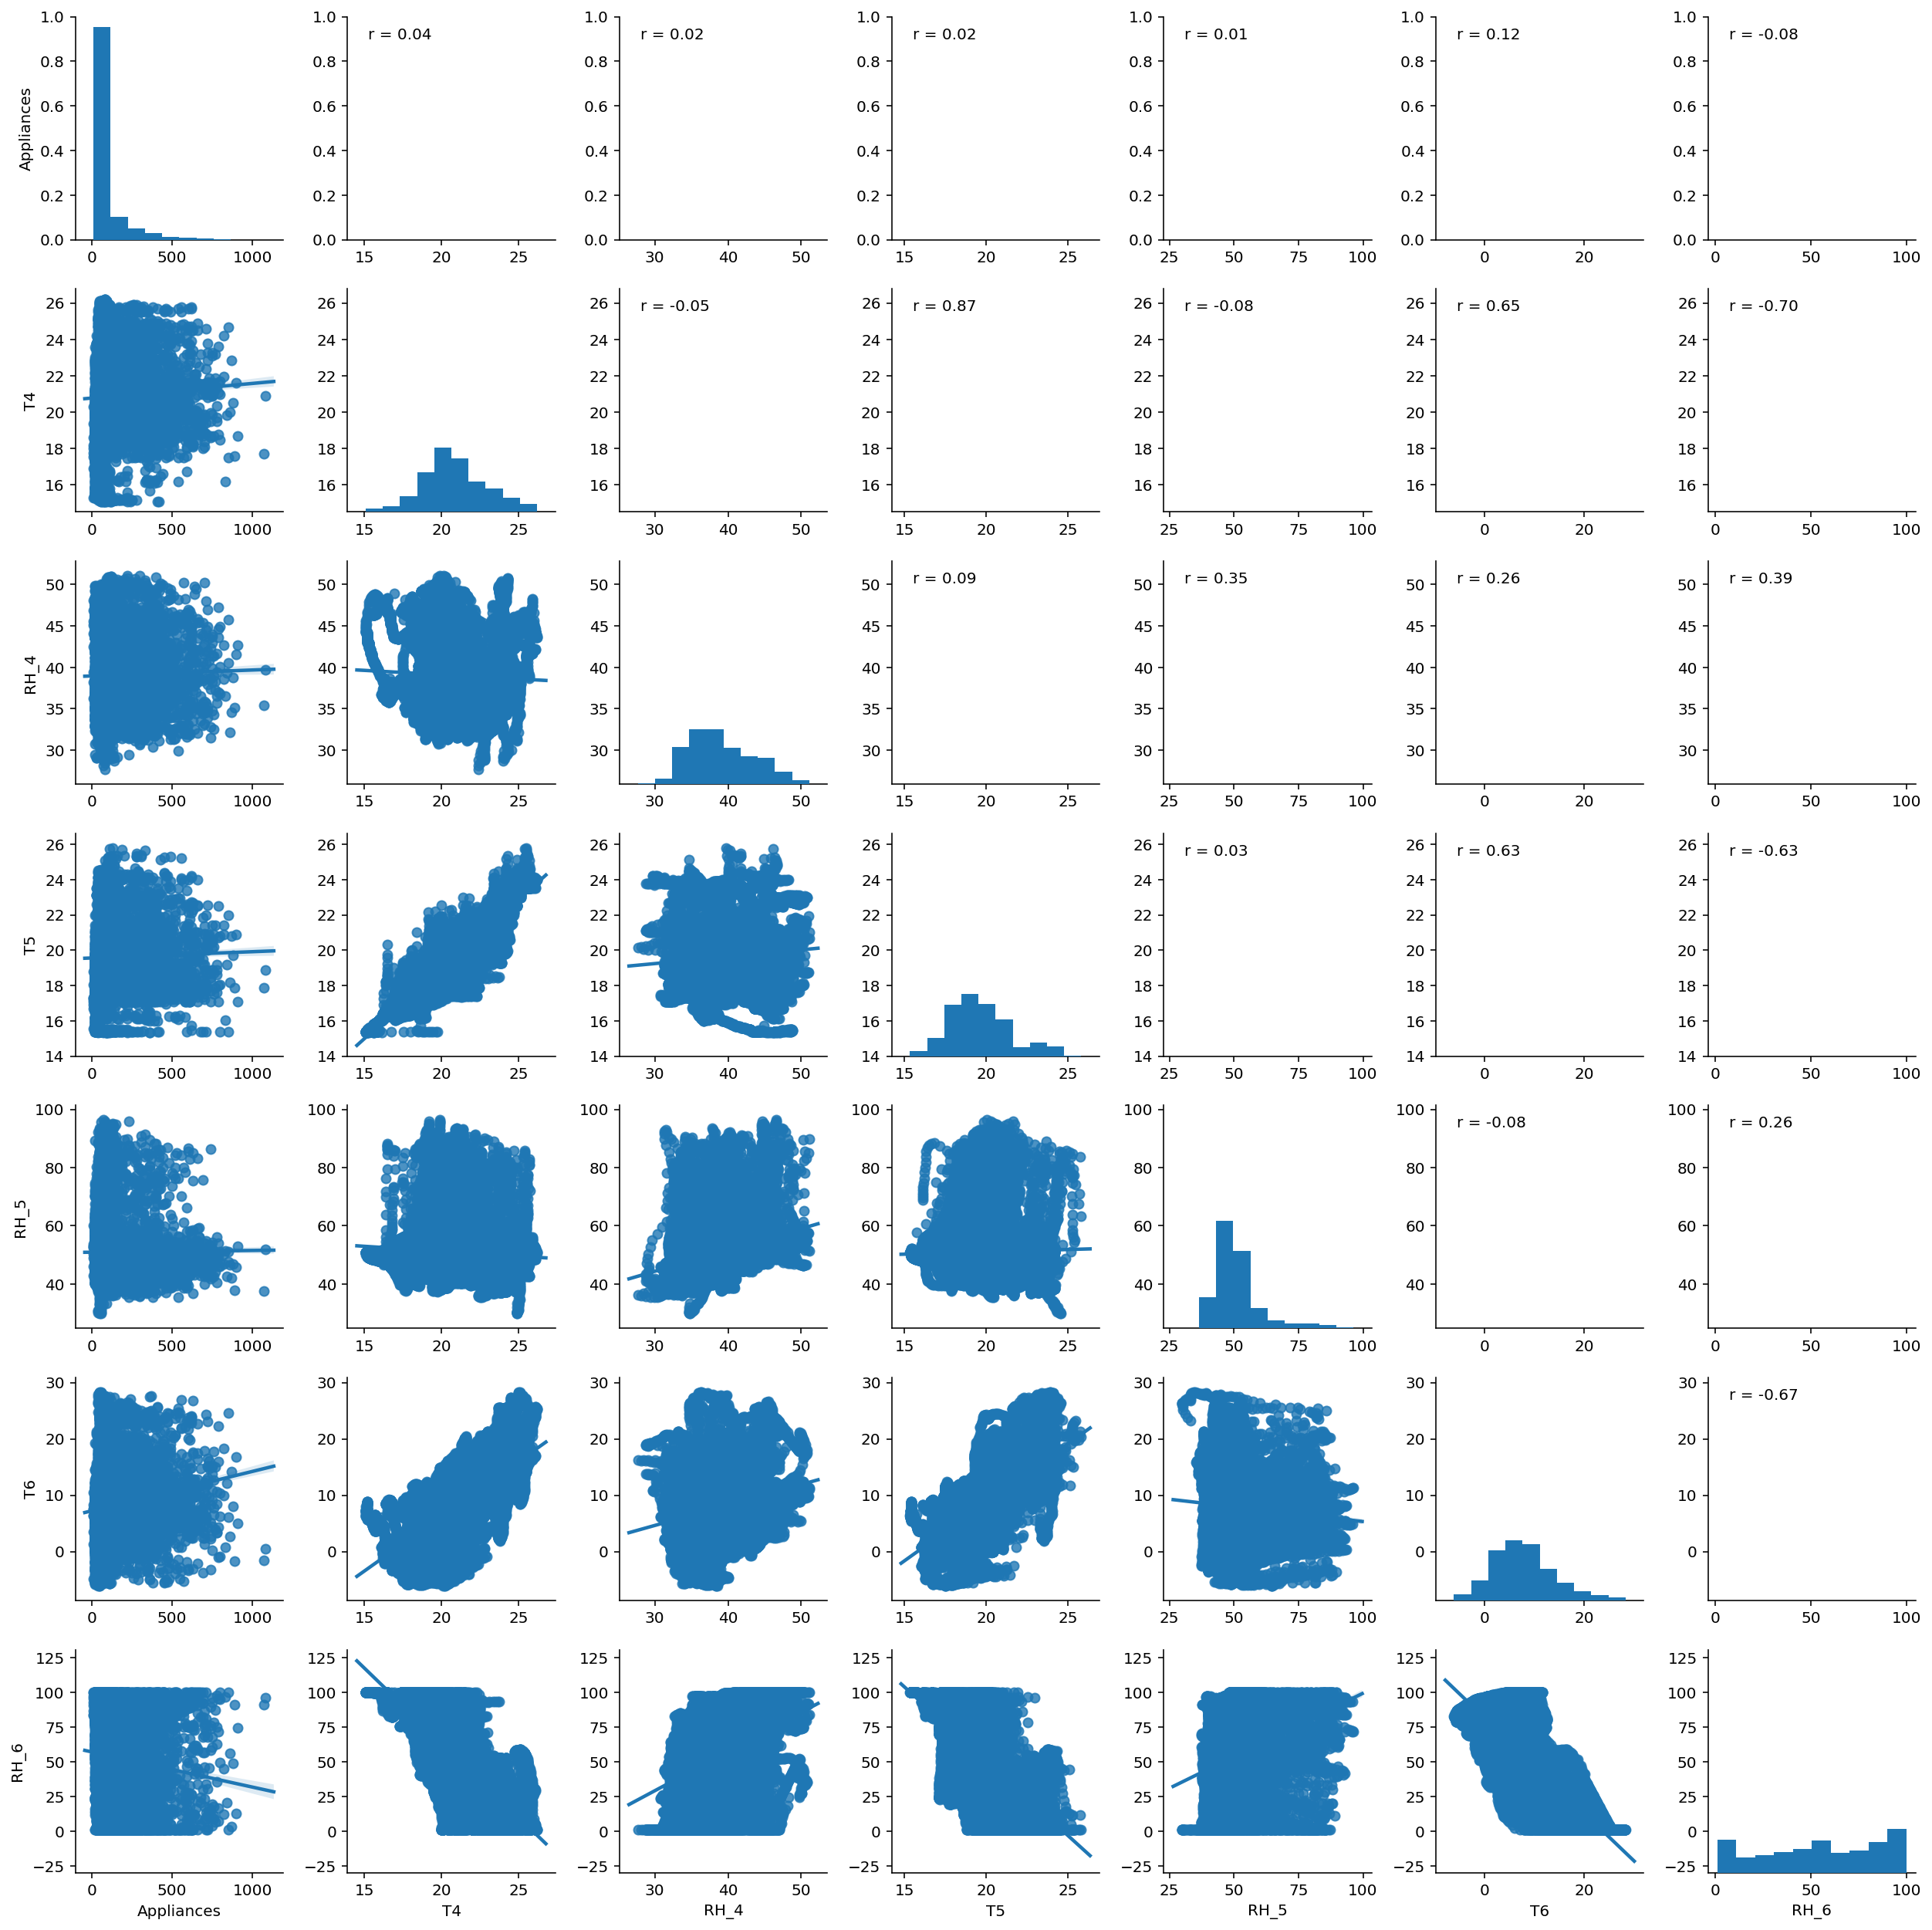

In [182]:
g = sns.PairGrid(df[['Appliances', 'T4', 'RH_4','T5','RH_5','T6','RH_6']]) 
g.map_lower(sns.regplot) 
g.map_diag(plt.hist) 
g.map_upper(corrfunc)

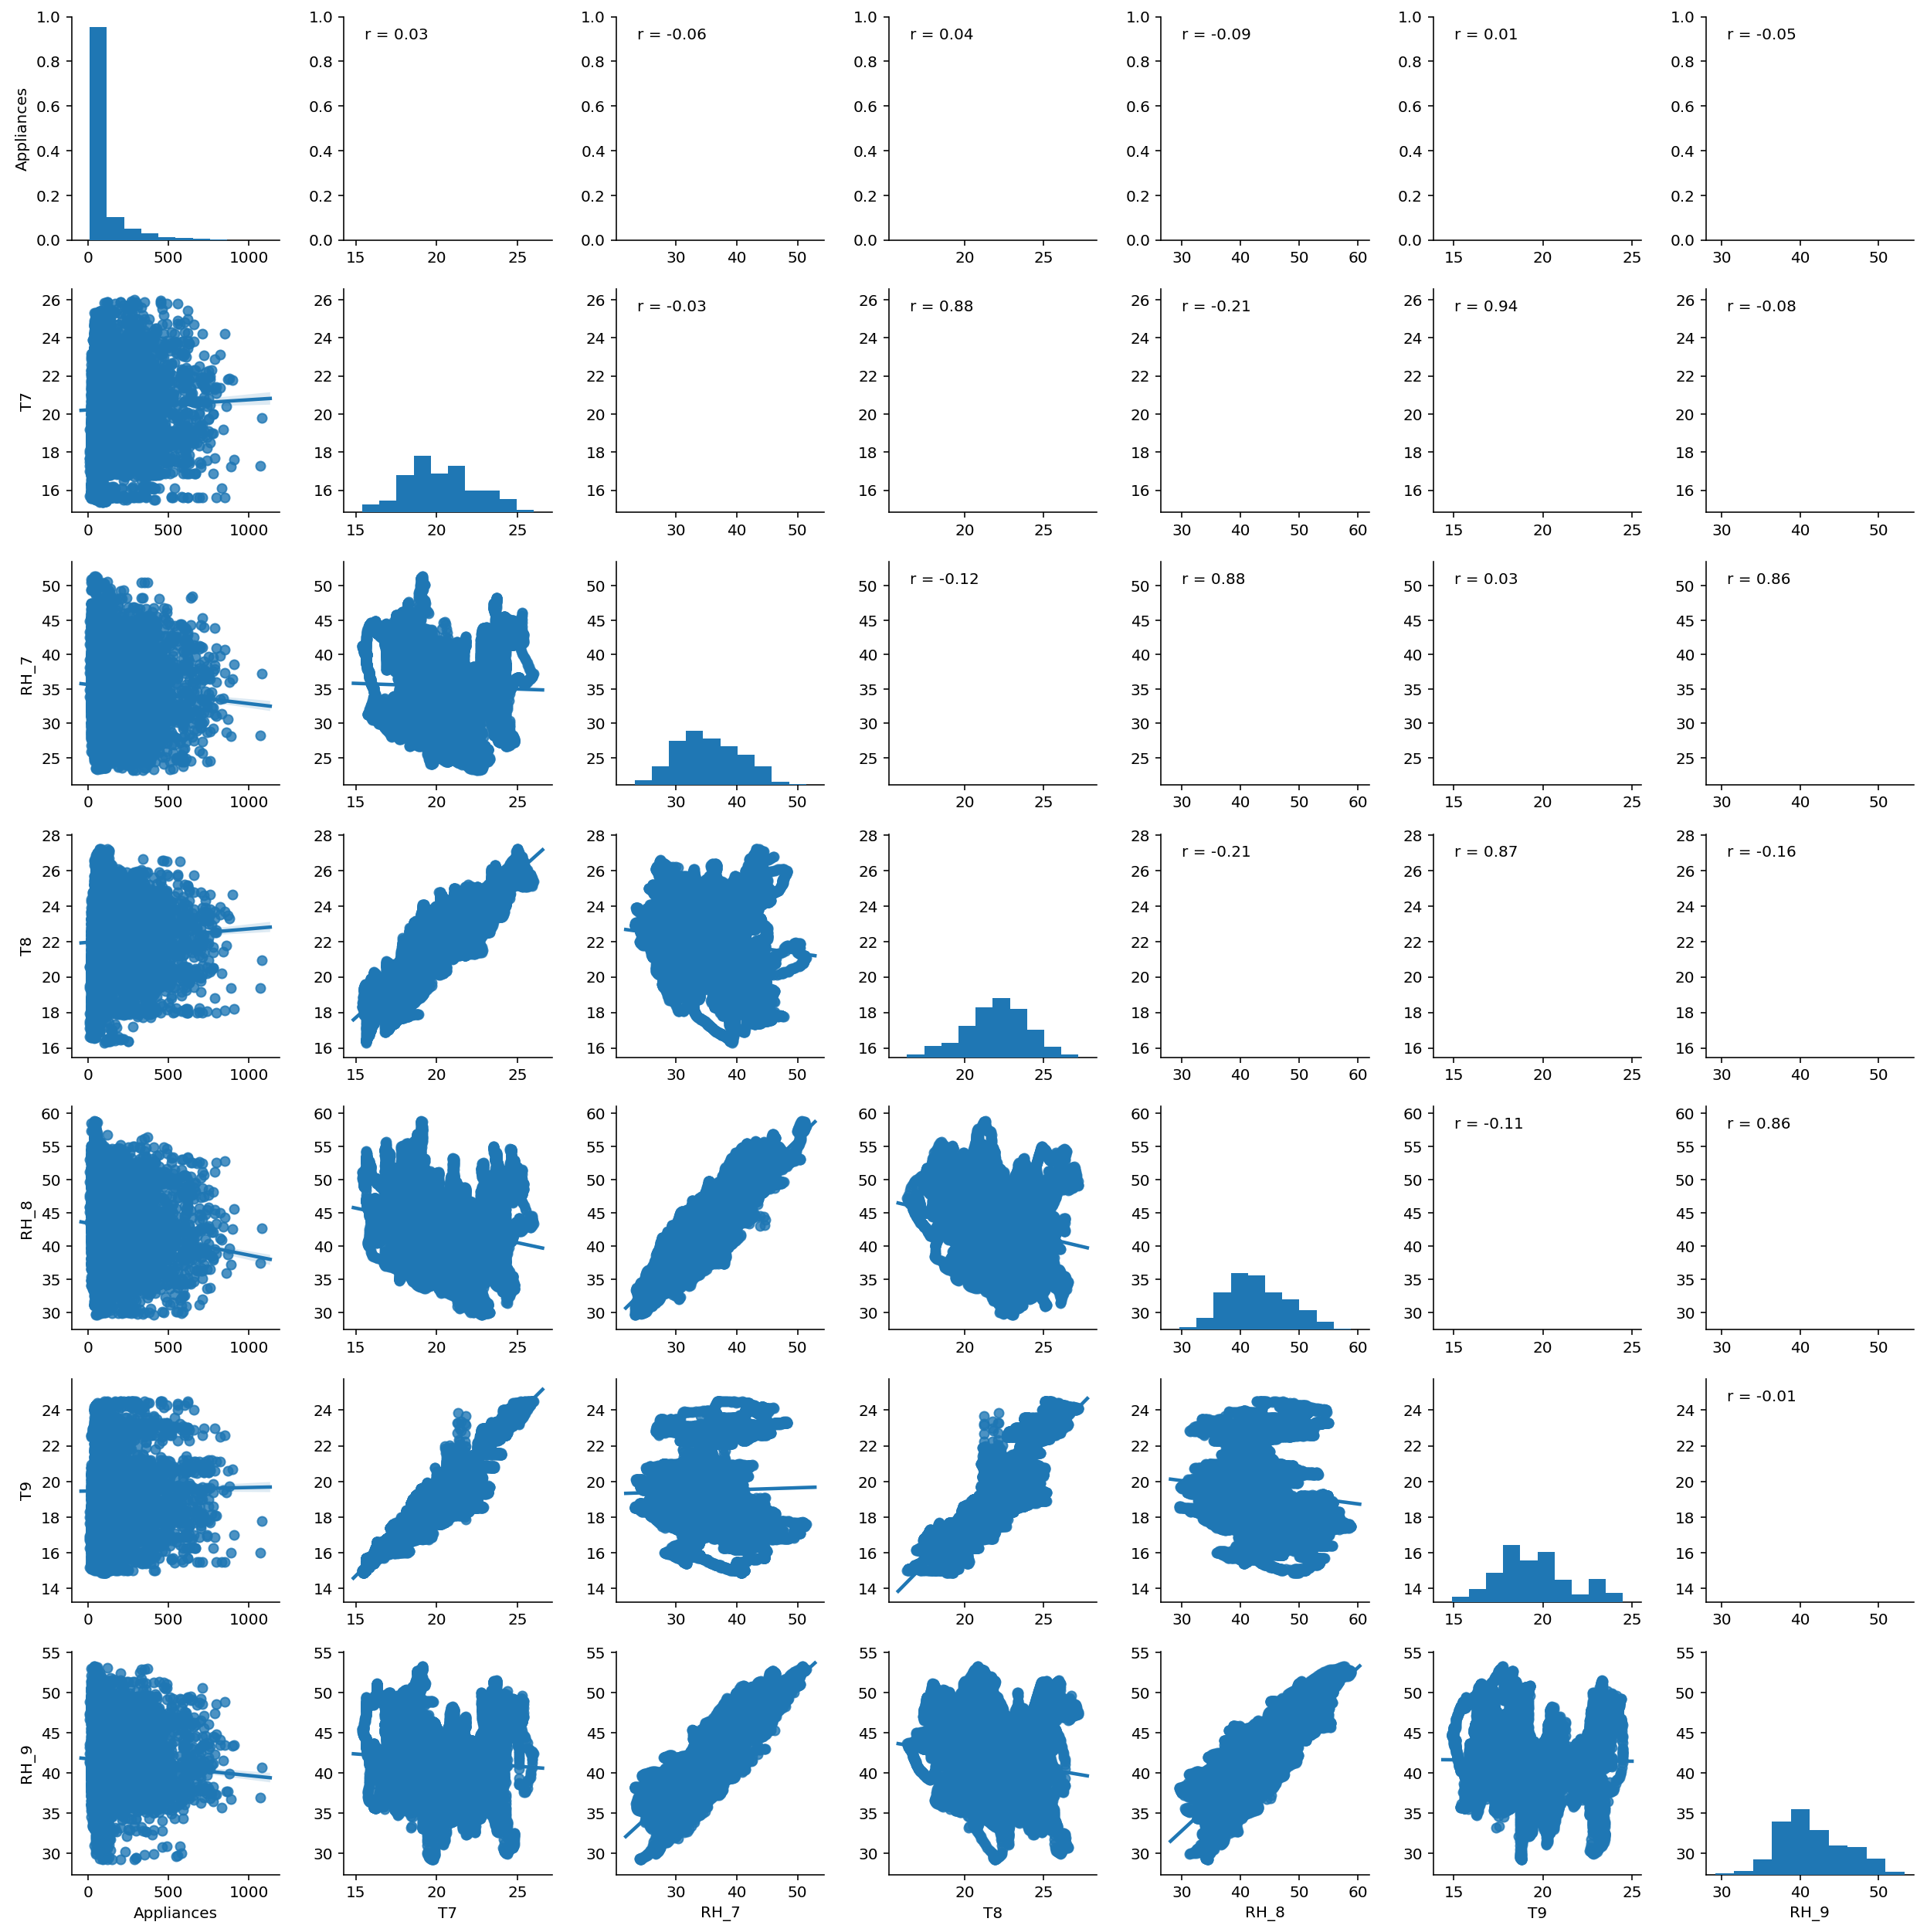

In [183]:
g = sns.PairGrid(df[['Appliances', 'T7', 'RH_7','T8','RH_8','T9','RH_9']]) 
g.map_lower(sns.regplot) 
g.map_diag(plt.hist) 
g.map_upper(corrfunc)

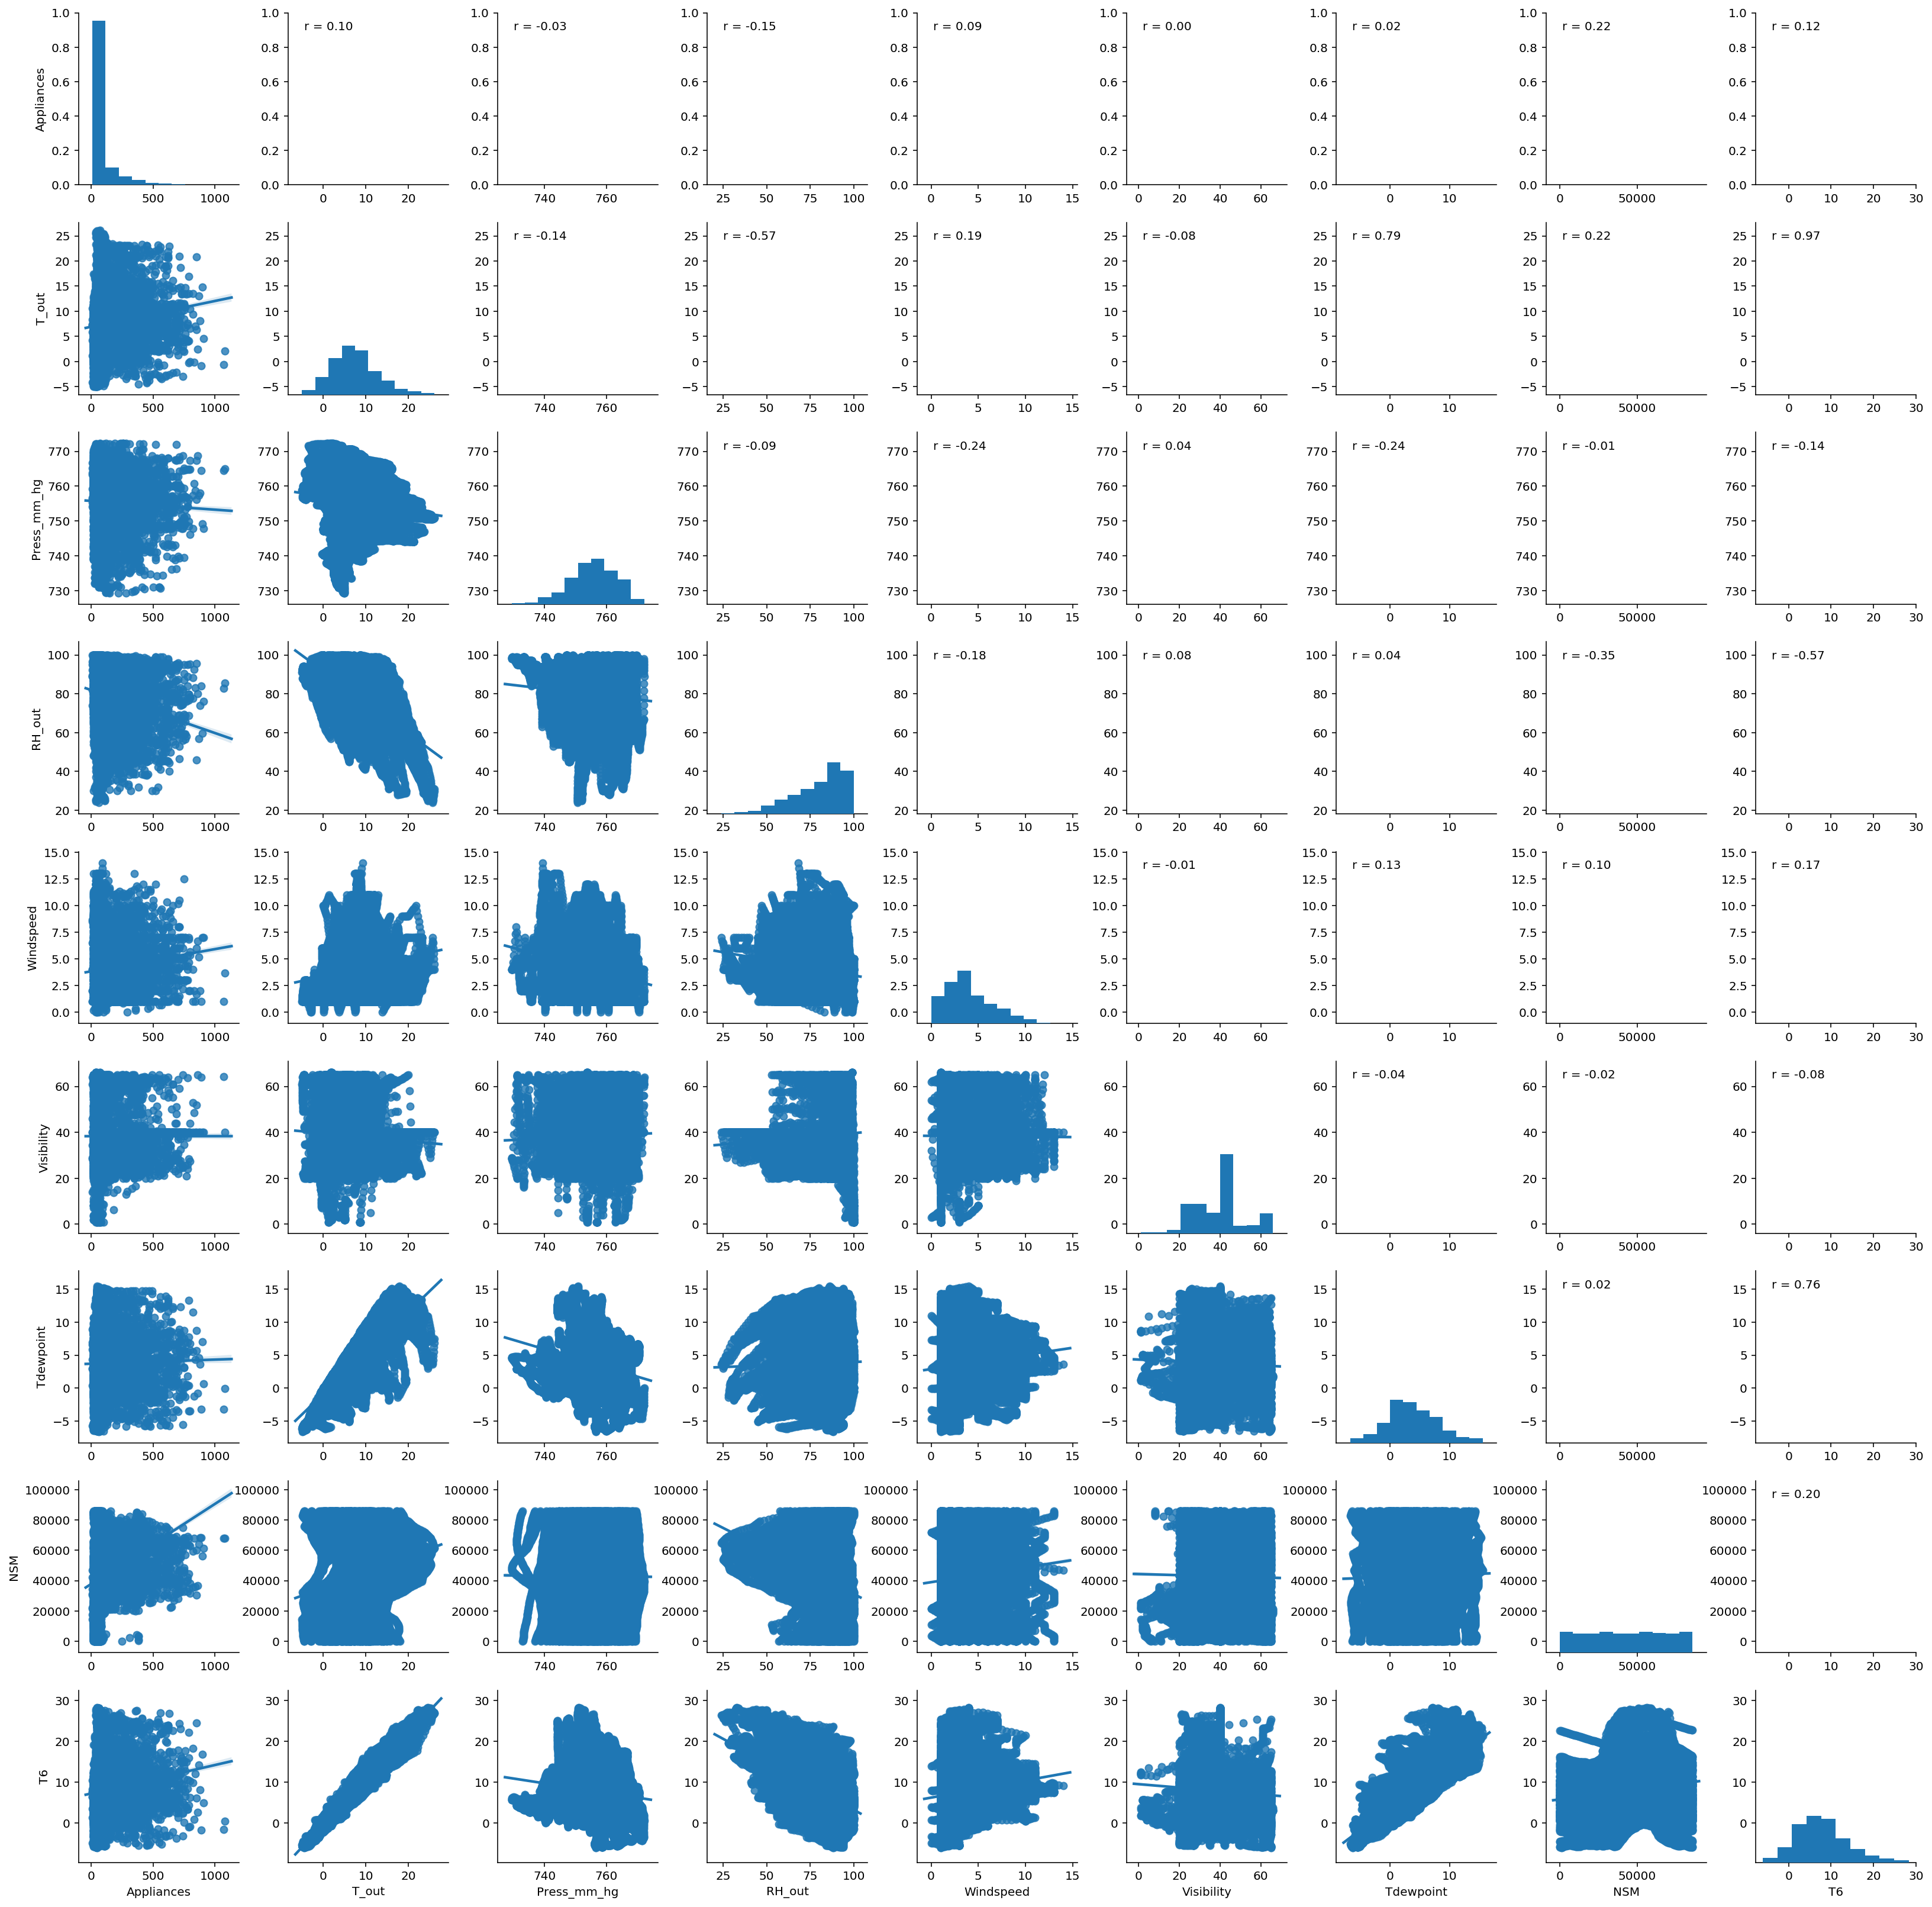

In [193]:
g = sns.PairGrid(df[['Appliances', 'T_out', 'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','NSM','T6']]) 
g.map_lower(sns.regplot) 
g.map_diag(plt.hist) 
g.map_upper(corrfunc)

In [165]:
new_index= {}
for i,d in zip(range(0,7),['Mon','Tus','Wed','Thur','Fri','Sat','Sun']):
                                 new_index[i]=d
def get_week_data(time1,time2):
    list_hour = ["{:02d}".format(x) for x in range(0,24)]
    list_day = ["2016-02-"+day for day in ["{:02d}".format(x) for x in range(time1,time2)]]
    dat = pd.DataFrame([df[df.date.str.contains(da + " " + x)]['Appliances'].sum() for x in list_hour] for da in list_day)
    dat = dat.rename(index=new_index)
    return dat
dat_1 = get_week_data(1,8)
dat_2 = get_week_data(8,15)
dat_3 = get_week_data(15,22)
dat_4 = get_week_data(22,29)

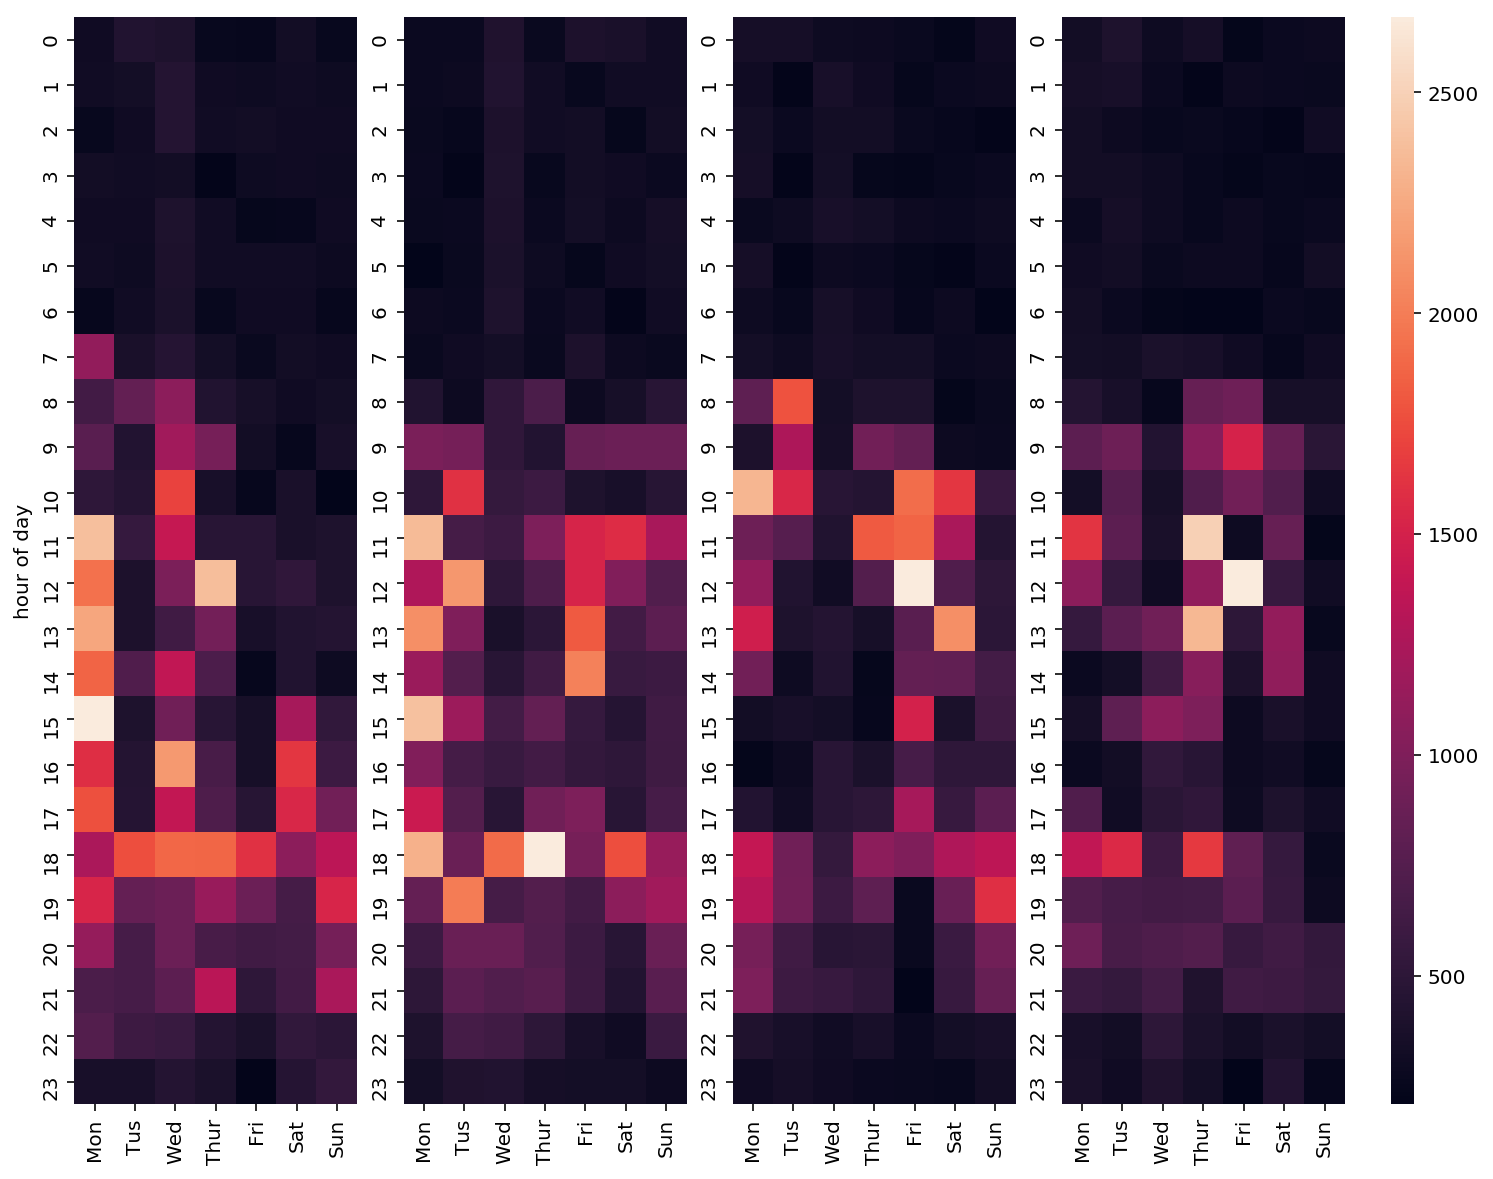

In [181]:
f,(ax1,ax2,ax3,ax4, axcb) = plt.subplots(1,5,gridspec_kw={'width_ratios':[1,1,1,1,0.08]},figsize=(12,10))
ax1.get_shared_y_axes().join(ax2,ax3,ax4)
g1 = sns.heatmap(dat_1.T,cbar=False,ax=ax1)
g1.set_ylabel("hour of day")
g2 = sns.heatmap(dat_2.T,cbar=False,ax=ax2)
g3 = sns.heatmap(dat_3.T,cbar=False,ax=ax3)
g4 = sns.heatmap(dat_4.T,ax=ax4,cbar_ax=axcb)
plt.show()

In [203]:
df.to_csv('/Users/chenlianxu/Desktop/cleaned_data.csv')